# Golden Age of Television

## Introduction <a id='intro'></a>
In this project I studied a dataset with records on movies and shows. The research will focus on the "Golden Age" of television, which began in 1999 with the release of *The Sopranos* and is still ongoing.

The aim of this project is to investigate how the number of votes a title receives impacts its ratings, with the assumption is that highly-rated TV shows released during the "Golden Age" of television also have the most votes.

### Stages
My project consists of the following stages:
 1. Data overview
 2. Data preprocessing
 3. Exploratory Data Analysis
 4. Statistical Data Analysis
 5. Conclusion

## Data Overview

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load dataset
df = pd.read_csv('movies_and_shows.csv')

In [3]:
# general info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85579 entries, 0 to 85578
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0      name       85579 non-null  object 
 1   Character     85579 non-null  object 
 2   r0le          85579 non-null  object 
 3   TITLE         85578 non-null  object 
 4     Type        85579 non-null  object 
 5   release Year  85579 non-null  int64  
 6   genres        85579 non-null  object 
 7   imdb sc0re    80970 non-null  float64
 8   imdb v0tes    80853 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 5.9+ MB


In [4]:
# look at first 10 rows of data
df.head(10)

,name,Character,r0le,TITLE,Type,release Year,genres,imdb sc0re,imdb v0tes
0,Robert De Niro,Travis Bickle,ACTOR,Taxi Driver,MOVIE,1976,"['drama', 'crime']",8.2,808582.0
1,Jodie Foster,Iris Steensma,ACTOR,Taxi Driver,MOVIE,1976,"['drama', 'crime']",8.2,808582.0
2,Albert Brooks,Tom,ACTOR,Taxi Driver,MOVIE,1976,"['drama', 'crime']",8.2,808582.0
3,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,Taxi Driver,MOVIE,1976,"['drama', 'crime']",8.2,808582.0
4,Cybill Shepherd,Betsy,ACTOR,Taxi Driver,MOVIE,1976,"['drama', 'crime']",8.2,808582.0
5,Peter Boyle,Wizard,ACTOR,Taxi Driver,MOVIE,1976,"['drama', 'crime']",8.2,808582.0
6,Leonard Harris,Senator Charles Palantine,ACTOR,Taxi Driver,MOVIE,1976,"['drama', 'crime']",8.2,808582.0
7,Diahnne Abbott,Concession Girl,ACTOR,Taxi Driver,MOVIE,1976,"['drama', 'crime']",8.2,808582.0
8,Gino Ardito,Policeman at Rally,ACTOR,Taxi Driver,MOVIE,1976,"['drama', 'crime']",8.2,808582.0
9,Martin Scorsese,Passenger Watching Silhouette,ACTOR,Taxi Driver,MOVIE,1976,"['drama', 'crime']",8.2,808582.0


## Data Preprocessing

In [5]:
# renaming columns
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('0','o')
df.columns = df.columns.str.replace(' ','_')

In [6]:
# checking changes
df.columns

Index(['name', 'character', 'role', 'title', 'type', 'release_year', 'genres',
       'imdb_score', 'imdb_votes'],
      dtype='object')

In [7]:
# check for duplicate rows
df.duplicated().sum()

7675

In [8]:
# investigate duplicate rows
df[df.duplicated(keep=False)==True]

,name,character,role,title,type,release_year,genres,imdb_score,imdb_votes
7560,Philip Greene,Baseball Fan (uncredited),ACTOR,How Do You Know,MOVIE,2010,"['comedy', 'drama', 'romance']",5.4,50383.0
7561,Philip Greene,Baseball Fan (uncredited),ACTOR,How Do You Know,MOVIE,2010,"['comedy', 'drama', 'romance']",5.4,50383.0
14502,Dan Levy,Reporter,ACTOR,A Very Harold & Kumar Christmas,MOVIE,2011,"['comedy', 'fantasy', 'romance']",6.2,69562.0
14512,Dan Levy,Reporter,ACTOR,A Very Harold & Kumar Christmas,MOVIE,2011,"['comedy', 'fantasy', 'romance']",6.2,69562.0
18951,Nicolas Le Nev??,unknown,DIRECTOR,Sammy & Co,SHOW,2014,"['animation', 'european']",5.7,31.0
...,...,...,...,...,...,...,...,...,...
85569,Jessica Cediel,Liliana Navarro,ACTOR,Lokillo,MOVIE,2021,['comedy'],3.8,68.0
85570,Javier Gardeaz?­bal,"Agust??n ""Peluca"" Ort??z",ACTOR,Lokillo,MOVIE,2021,['comedy'],3.8,68.0
85571,Carla Giraldo,Valery Reinoso,ACTOR,Lokillo,MOVIE,2021,['comedy'],3.8,68.0
85572,Ana Mar??a S?­nchez,Lourdes,ACTOR,Lokillo,MOVIE,2021,['comedy'],3.8,68.0


In [9]:
# remove duplicate rows
df = df.drop_duplicates().reset_index(drop=True)

In [10]:
# check for implicit duplicates
df[df.title.duplicated(keep=False)]

,name,character,role,title,type,release_year,genres,imdb_score,imdb_votes
0,Robert De Niro,Travis Bickle,ACTOR,Taxi Driver,MOVIE,1976,"['drama', 'crime']",8.2,808582.0
1,Jodie Foster,Iris Steensma,ACTOR,Taxi Driver,MOVIE,1976,"['drama', 'crime']",8.2,808582.0
2,Albert Brooks,Tom,ACTOR,Taxi Driver,MOVIE,1976,"['drama', 'crime']",8.2,808582.0
3,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,Taxi Driver,MOVIE,1976,"['drama', 'crime']",8.2,808582.0
4,Cybill Shepherd,Betsy,ACTOR,Taxi Driver,MOVIE,1976,"['drama', 'crime']",8.2,808582.0
...,...,...,...,...,...,...,...,...,...
77899,A??da Morales,Maritza,ACTOR,Lokillo,the movie,2021,['comedy'],3.8,68.0
77900,Adelaida Buscato,Mar??a Paz,ACTOR,Lokillo,the movie,2021,['comedy'],3.8,68.0
77901,Luz Stella Luengas,Karen Bayona,ACTOR,Lokillo,the movie,2021,['comedy'],3.8,68.0
77902,In??s Prieto,Fanny,ACTOR,Lokillo,the movie,2021,['comedy'],3.8,68.0


In [11]:
# remove implicit duplicates
df.title.drop_duplicates(inplace=True)

In [12]:
# check changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77904 entries, 0 to 77903
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          77904 non-null  object 
 1   character     77904 non-null  object 
 2   role          77904 non-null  object 
 3   title         77903 non-null  object 
 4   type          77904 non-null  object 
 5   release_year  77904 non-null  int64  
 6   genres        77904 non-null  object 
 7   imdb_score    73946 non-null  float64
 8   imdb_votes    73859 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 5.3+ MB


In [13]:
# check missing values
df.isna().sum()

name               0
character          0
role               0
title              1
type               0
release_year       0
genres             0
imdb_score      3958
imdb_votes      4045
dtype: int64

In [14]:
# dropping rows where columns with title, scores and votes have missing values
df = df.dropna(axis='rows')

In [15]:
# check changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73859 entries, 0 to 77903
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          73859 non-null  object 
 1   character     73859 non-null  object 
 2   role          73859 non-null  object 
 3   title         73859 non-null  object 
 4   type          73859 non-null  object 
 5   release_year  73859 non-null  int64  
 6   genres        73859 non-null  object 
 7   imdb_score    73859 non-null  float64
 8   imdb_votes    73859 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


In [16]:
# viewing unique type names
df['type'].unique()

array(['MOVIE', 'the movie', 'tv show', 'shows', 'movies', 'tv shows',
       'tv series', 'tv', 'SHOW'], dtype=object)

In [17]:
# fix implicit values in the type column
df['type'] = df.type.apply(lambda x: x.lower())
df['type'] = df.type.replace(['tv show','shows','tv shows','tv series','tv'],'show')

In [18]:
# check changes
df.type.unique()

array(['movie', 'the movie', 'show', 'movies'], dtype=object)

In [19]:
# check unique values in genres column
df.genres.unique()

array(["['drama', 'crime']",
       "['drama', 'action', 'thriller', 'european']",
       "['fantasy', 'action', 'comedy']", ...,
       "['drama', 'animation', 'music']",
       "['animation', 'family', 'scifi']",
       "['documentation', 'music', 'reality']"], dtype=object)

In [20]:
# remove rows that are not tv shows
df = df[df.type=='show']

In [21]:
# separate dataset into shows before and after 1999
golden_df = df[df.release_year>=1999]
pregolden_df = df[df.release_year<1999]

I have corrected all of the naming conventions in the headers and have addressed all missing and duplicate values in the dataset. I also filtered the dataset, so that only tv shows are included. I also separated all of television shows that were part of the Golden Age from those shows that were preceeded the Golden Age. 

## Exploratory Data Analysis

In [22]:
# descriptive stats of golden age data
golden_df.describe()

,release_year,imdb_score,imdb_votes
count,13430.000000,13430.000000,1.343000e+04
mean,2017.745867,7.119866,2.117419e+04
std,3.928068,0.996684,8.272109e+04
min,1999.000000,2.000000,5.000000e+00
25%,2017.000000,6.600000,7.430000e+02
50%,2019.000000,7.200000,2.605000e+03
75%,2020.000000,7.800000,9.159000e+03
max,2022.000000,9.500000,1.775990e+06


In [23]:
# descriptive stats of pre golden age data
pregolden_df.describe()

,release_year,imdb_score,imdb_votes
count,174.000000,174.000000,174.000000
mean,1991.643678,7.051724,26678.132184
std,7.042361,1.306574,51028.407198
min,1969.000000,3.800000,6.000000
25%,1989.000000,6.500000,3545.000000
50%,1994.000000,7.400000,9624.000000
75%,1997.000000,8.000000,22110.000000
max,1998.000000,8.900000,308824.000000


In [24]:
# round scores for easier grouping
golden_df.loc[:,'imdb_score'] = golden_df.imdb_score.round(0)
pregolden_df.loc[:,'imdb_score'] = pregolden_df.imdb_score.round(0)

Text(0.5, 1.0, 'Distributions of IMDB Scores')

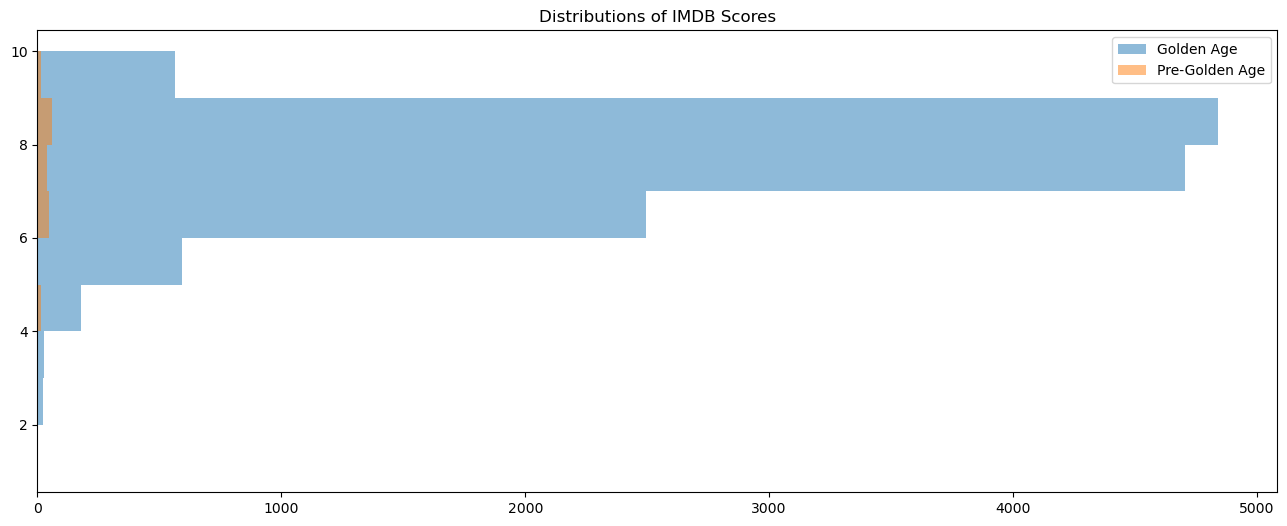

In [25]:
# histogram of imdb scores of both golden age and pre golden age tv shows
plt.figure(figsize=(16,6))
plt.hist(golden_df.imdb_score,label='Golden Age',alpha=0.5,bins=list(range(1,11)),
         orientation='horizontal')
plt.hist(pregolden_df.imdb_score,label='Pre-Golden Age',alpha=0.5,bins=list(range(1,11)),
         orientation='horizontal')
plt.legend(loc='upper right')
plt.title('Distributions of IMDB Scores')

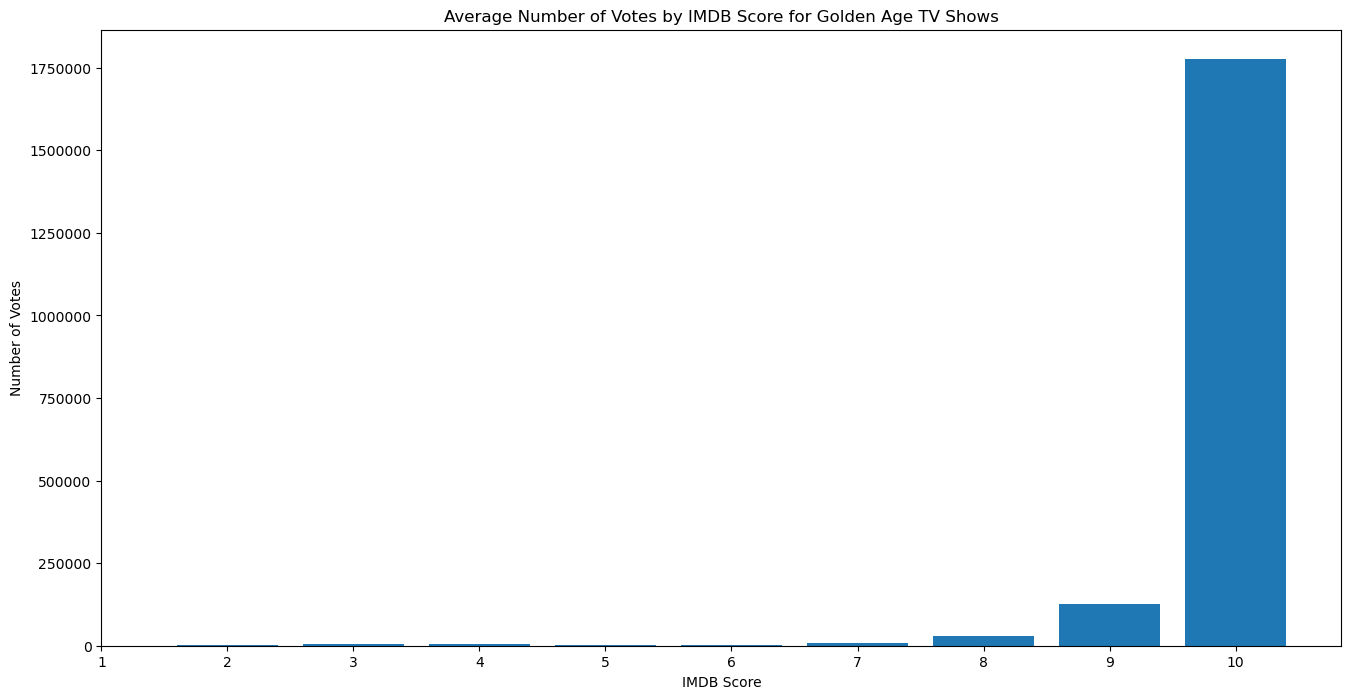

In [36]:
# bar graph of average number of votes by imdb_score
avg_votes = golden_df.groupby('imdb_score')['imdb_votes'].mean()
plt.figure(figsize=(16,8))
plt.bar(x=avg_votes.index,height=avg_votes)
plt.xlabel('IMDB Score')
plt.ylabel('Number of Votes')
plt.title('Average Number of Votes by IMDB Score for Golden Age TV Shows')
plt.xticks(list(range(1,11)))
plt.ticklabel_format(axis='both',style='plain')

The assumption matches the analysis: the shows with the top 3 scores also have the most amount of votes. 

## Conclusion <a id='hypotheses'></a>

The research done confirms that highly-rated shows released during the "Golden Age" of television also have the most votes. While shows with score 4 have more votes than ones with scores 5 and 6, the top three (scores 7-9) have the largest number. The data studied represents around 94% of the original set, so we can be confident in our findings.